In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2

np.random.seed(42)

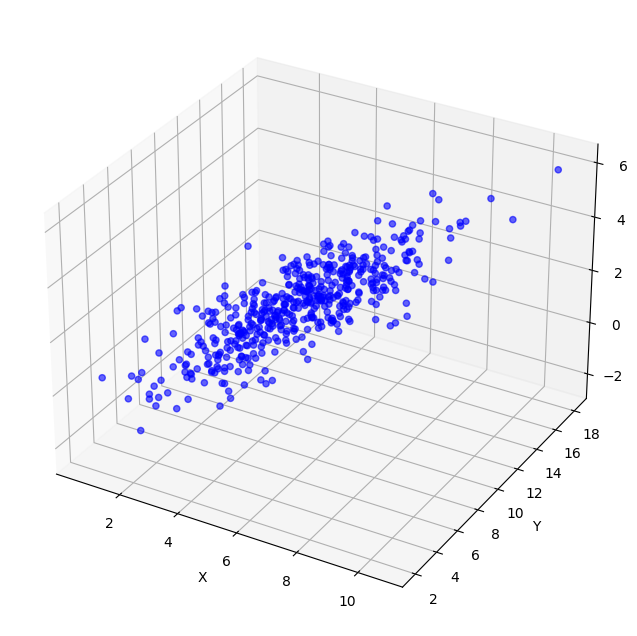

Covariance Matrix:
[[2.95966903 1.80285523 1.99151197]
 [1.80285523 8.70720214 0.88262769]
 [1.99151197 0.88262769 2.05348983]]

Eigenvalues:
[9.50326725 3.77867847 0.43841527]

Eigenvectors:
[[-0.31507457  0.69670744  0.64445851]
 [-0.92896714 -0.36540773 -0.05913746]
 [-0.19428861  0.61731349 -0.762349  ]]


In [17]:
n_samples = 500
mean = np.array([5, 10, 2])
cov = np.array([[3, 2, 2],
                [2, 10, 1],
                [2, 1, 2]])

X = np.random.multivariate_normal(mean, cov, n_samples)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='o', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

X_centered = X - np.mean(X, axis=0)

cov_matrix = np.cov(X_centered.T)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# print(X, X.shape)
#print(eigenvalues, eigenvectors)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Covariance Matrix:")
print(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

([<matplotlib.axis.XTick at 0x1ec141963b0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

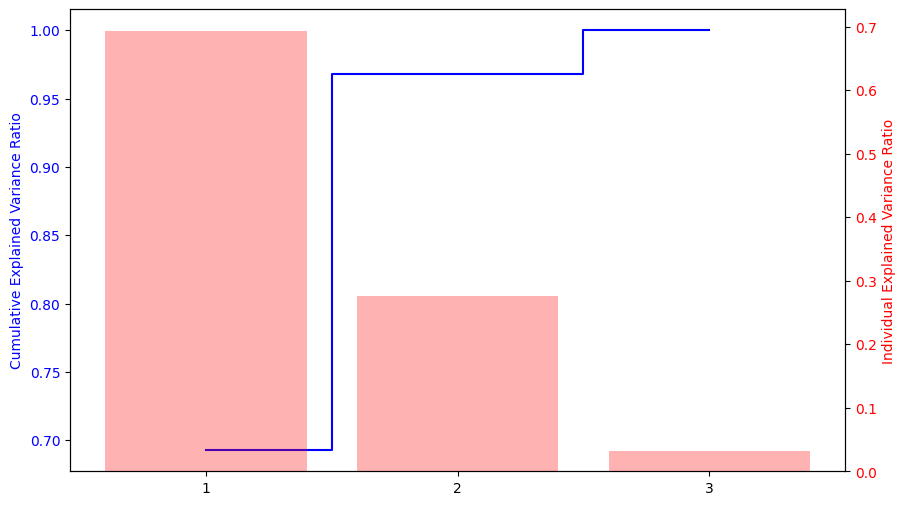

In [18]:
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.step(range(1, len(eigenvalues) + 1), cumulative_variance_ratio, where='mid', color='blue')
ax1.set_ylabel('Cumulative Explained Variance Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio, alpha=0.3, color='red')
ax2.set_ylabel('Individual Explained Variance Ratio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xlabel('Principal Component')
plt.xticks(range(1, len(eigenvalues) + 1))

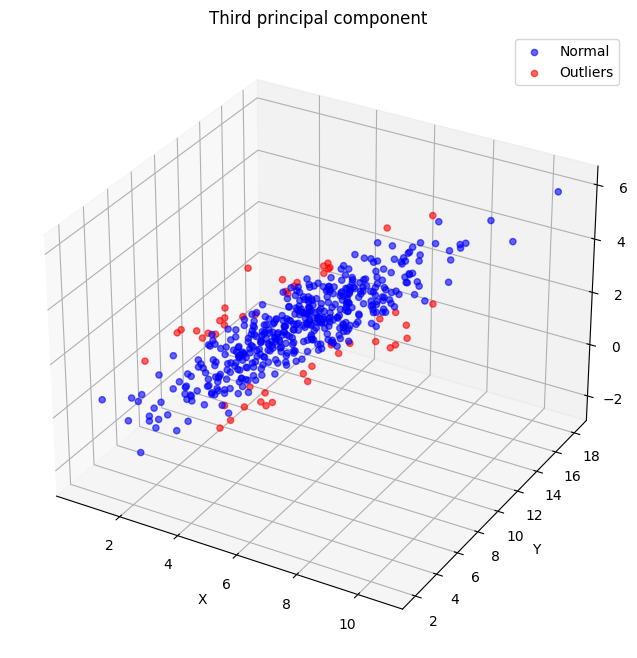

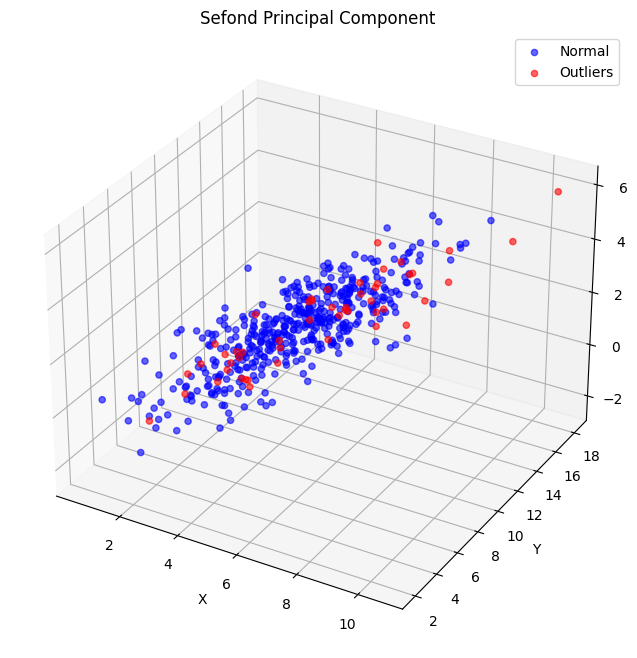

Number of outliers-third component: 50
Number of outliers-second component: 50


In [19]:
X_pca = X_centered @ eigenvectors

def detect_outliers(data, component_idx, contamination=0.1):
    component_values = data[:, component_idx]
    threshold = np.quantile(np.abs(component_values - np.mean(component_values)), 1 - contamination)
    outliers = np.abs(component_values - np.mean(component_values)) > threshold

    return outliers

outliers_3rd = detect_outliers(X_pca, 2, contamination=0.1)
# print(outliers_3rd)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[~outliers_3rd, 0], X[~outliers_3rd, 1], X[~outliers_3rd, 2], 
          c='b', marker='o', alpha=0.6, label='Normal')
ax.scatter(X[outliers_3rd, 0], X[outliers_3rd, 1], X[outliers_3rd, 2], 
          c='r', marker='o', alpha=0.6, label='Outliers')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Third principal component')
ax.legend()

outliers_2nd = detect_outliers(X_pca, 1, contamination=0.1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[~outliers_2nd, 0], X[~outliers_2nd, 1], X[~outliers_2nd, 2], 
          c='b', marker='o', alpha=0.6, label='Normal')
ax.scatter(X[outliers_2nd, 0], X[outliers_2nd, 1], X[outliers_2nd, 2], 
          c='r', marker='o', alpha=0.6, label='Outliers')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sefond Principal Component')
ax.legend()

print(f"Number of outliers-third component: {np.sum(outliers_3rd)}")
print(f"Number of outliers-second component: {np.sum(outliers_2nd)}")

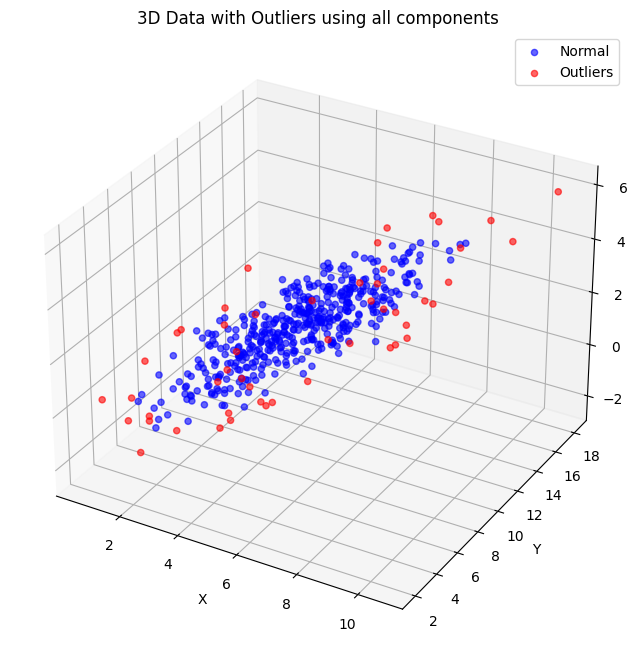

In [21]:
X_pca = X_centered @ eigenvectors

std_devs = np.std(X_pca, axis=0)
X_normalized = X_pca / std_devs
squared_distances = np.sum(X_normalized**2, axis=1)

# contamination=0.1
threshold = chi2.ppf(0.9, df=3)  

outliers = squared_distances > threshold

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[~outliers, 0], X[~outliers, 1], X[~outliers, 2],  c='b', marker='o', alpha=0.6, label='Normal')
ax.scatter(X[outliers, 0], X[outliers, 1], X[outliers, 2], c='r', marker='o', alpha=0.6, label='Outliers')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data with Outliers using all components')
ax.legend()